<a href="https://colab.research.google.com/github/AmaniBKL/Workshops-ML/blob/main/Workshop2_KCHousingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['price'].describe

<bound method NDFrame.describe of 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


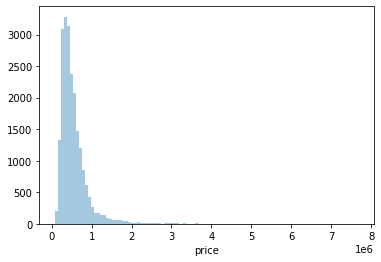

In [ ]:
sns.distplot(df['price'], bins=100, kde=False)

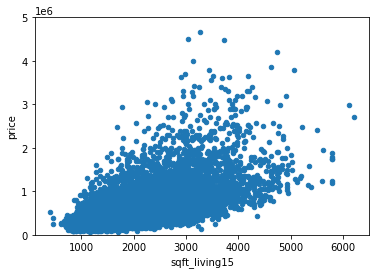

In [ ]:
data = pd.concat([df['price'], df['sqft_living15']],
                 axis = 1)

data.plot.scatter(x='sqft_living15', y='price', ylim=(0, 5000000))

(-0.5, 12.5, 0.0, 4000000.0)

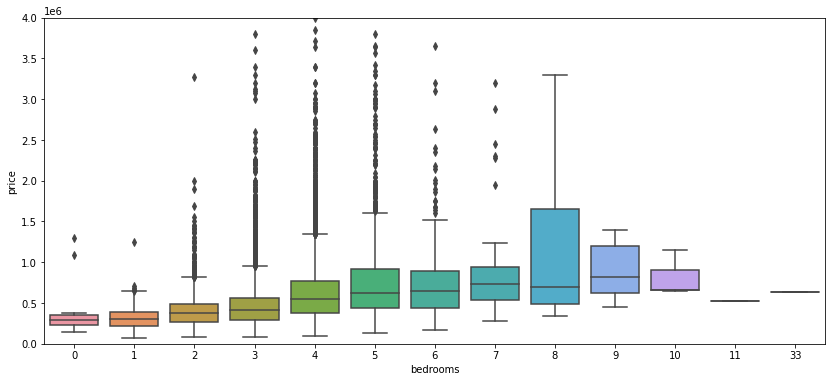

In [ ]:
data = pd.concat([df['price'], df['bedrooms']],
                 axis = 1)

f, ax = plt.subplots(figsize=(14,6))
fig = sns.boxplot(x='bedrooms', y='price', data=data)
fig.axis(ymin=0, ymax=4000000)

(-0.5, 11.5, 0.0, 4000000.0)

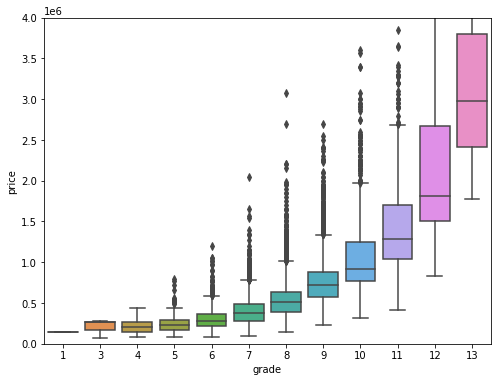

In [ ]:
data = pd.concat([df['price'], df['grade']],
                 axis = 1)

f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='grade', y='price', data=data)
fig.axis(ymin=0, ymax=4000000)

(-0.5, 29.5, 0.0, 4000000.0)

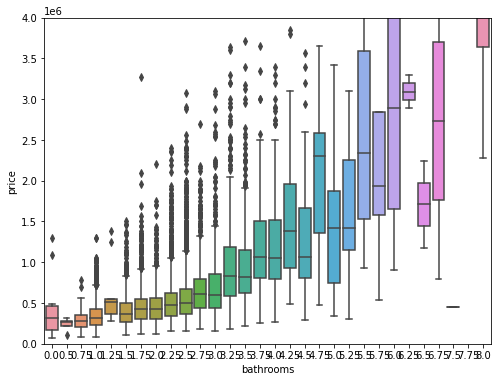

In [ ]:
data = pd.concat([df['price'], df['bathrooms']],
                 axis = 1)

f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='bathrooms', y='price', data=data)
fig.axis(ymin=0, ymax=4000000)

(-0.5, 4.5, 0.0, 4000000.0)

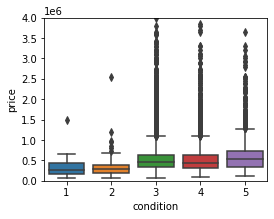

In [ ]:
data = pd.concat([df['price'], df['condition']],
                 axis = 1)

f, ax = plt.subplots(figsize=(4,3))
fig = sns.boxplot(x='condition', y='price', data=data)
fig.axis(ymin=0, ymax=4000000)

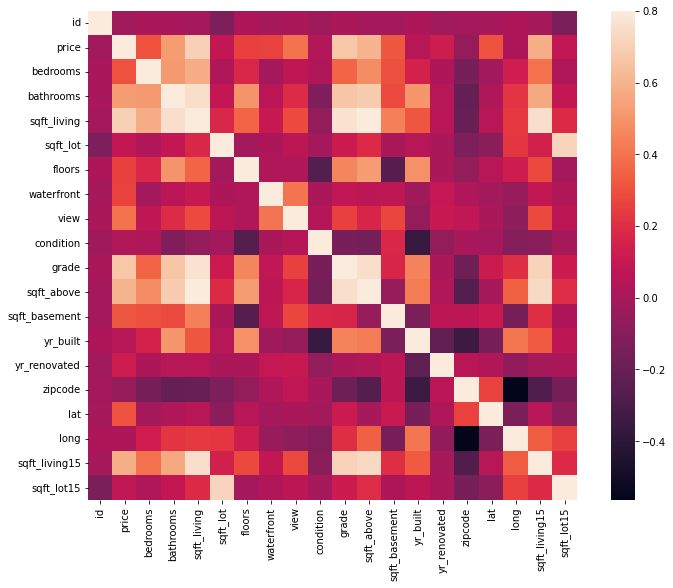

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True, vmax=.8)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


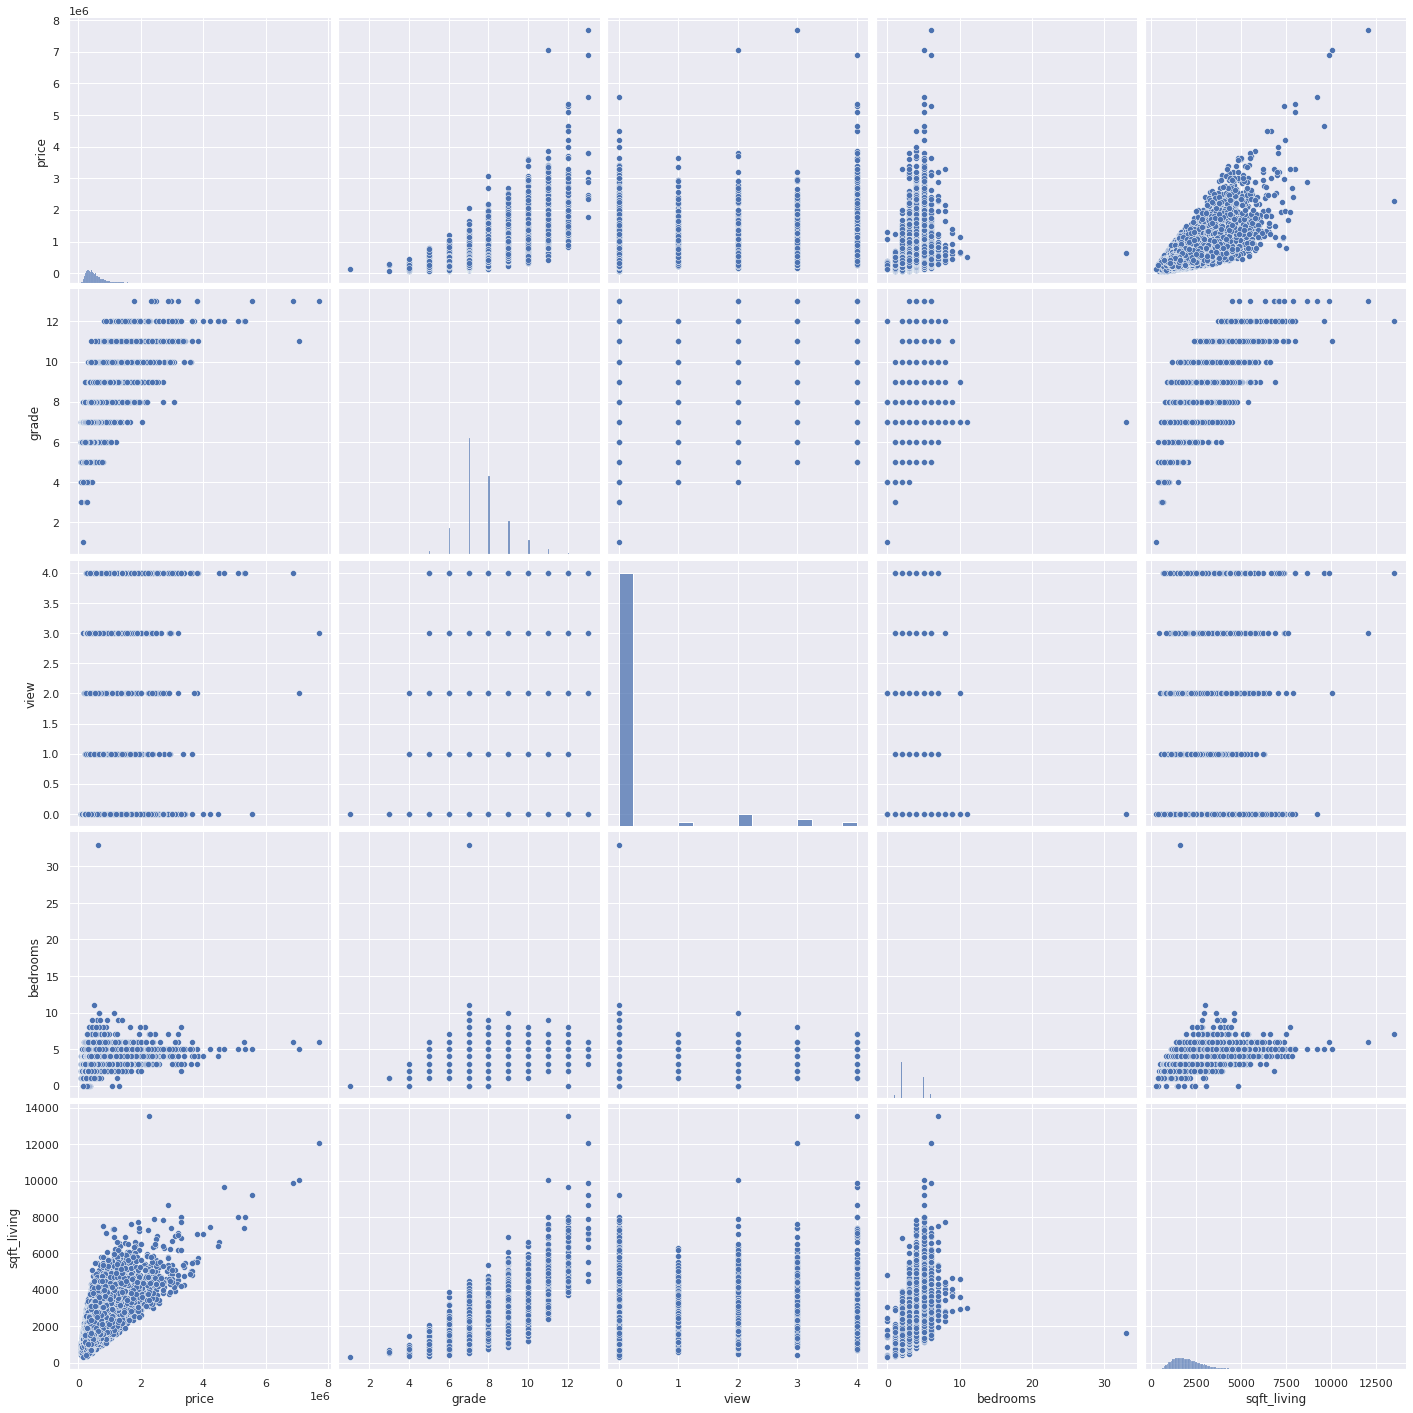

In [ ]:
sns.set()
cols = ['price', 'grade', 'view', 'bedrooms'
, 'sqft_living']

sns.pairplot(df[cols], size=4)
plt.show()

In [ ]:
df.price = (df.price - df.price.mean()) / df.price.std()

In [ ]:
# def operation(value, a, b) : 
#   value = (value - a)/b

# df.price.apply(operation, args=(df.price.mean(), df.price.std()))

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,-0.866697,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,-0.005688,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,-0.980827,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,0.174086,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,-0.081956,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
from sklearn.preprocessing import StandardScaler
std_prices = StandardScaler().fit_transform(df['price'][:,np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
std_prices

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])